
Q1: Explore these topics

-
Gradient Descent & Types of Gradient Descent

- Validation set & Validation loss

# **Gradient Descent:**
Gradient Descent is a commonly used optimizational algorithm in machine learning models & neural networks. It trains machine learning models by minimizing errors between predicted value & actual value.

# **Types of Gradient Descent**

1. Batch Gradient Descent:
   It updates the model's parameters by computing the average gradient of the error for the entire training dataset in each iteration (epoch).

2. Stochastic Gradient Descent:
   It updates the model's parameters by computing the gradient of the error for each individual training example and adjusting the parameters immediately.

3. Mini-Batch Gradient Descent:
   It updates the model's parameters by computing the gradient of the error for small, random subsets (mini-batches) of the training data and adjusting the parameters for each mini-batch.

# **Validation Set:**
A validation set is a subset of the training data used to evaluate the performance of a model during training and to tune hyperparameters without affecting the training process.

# **Validation Loss:**
Validation loss is the error calculated on the validation set, which helps monitor the model's performance and prevents overfitting by showing how well the model generalizes to unseen data.



Q2. Create a MLP model step by step as we discussed in class & load tips data from Seaborn Library.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [3]:
# convert categorical variables into numeric using one-hot coding
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Separate features and target variable
X = tips.drop('tip', axis=1)
y = tips['tip']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit on training data and transform
X_test = scaler.transform(X_test) # Transform the test data

In [4]:
# Create the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1))  # Regression problem, hence no activation function

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [5]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 53ms/step - loss: 11.7213 - mae: 3.0856 - val_loss: 8.4016 - val_mae: 2.5808
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 10.1526 - mae: 2.8168 - val_loss: 7.2663 - val_mae: 2.3369
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: 8.7703 - mae: 2.5527 - val_loss: 6.2581 - val_mae: 2.1123
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 7.5718 - mae: 2.2987 - val_loss: 5.3220 - val_mae: 1.9068
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 6.3501 - mae: 2.0346 - val_loss: 4.4928 - val_mae: 1.7158
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 5.3501 - mae: 1.7970 - val_loss: 3.7705 - val_mae: 1.5339
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 4.4474 - mae: 1.5811 - val_loss: 3.1667 - val_mae: 1.3883
Epoch 8/100
5/5 [==============================] - 0s 12ms/step - loss: 3.6099 - mae: 1.

In [6]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
print("Predictions: ", y_pred[:5])

# Calculate and print accuracy or performance metric
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

2/2 [==============================] - 0s 3ms/step
Predictions:  [[3.296719 ]
 [2.1733189]
 [4.088546 ]
 [2.8912961]
 [2.4351716]]
Test Loss: [1.236374020576477, 0.8611935377120972]


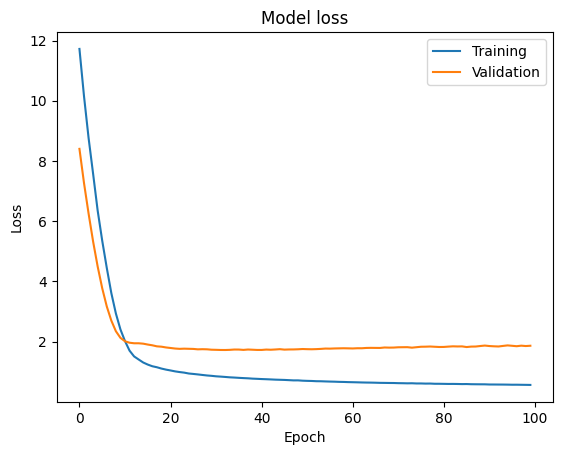

In [9]:
# Plotting training & validation loss values
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()